In [1]:
# Python示例（使用pandas和pingouin）
import pandas as pd
import pingouin as pg
df=pd.read_excel('299793279_按序号_政府补贴性政策对居民消费的影响_934_931.xlsx')


In [4]:
data = df.filter(like='11')
print(data.columns)

Index(['11、您对以下补贴方式的偏好程度如何？—现金补贴', '11、消费券', '11、折扣补贴'], dtype='object')


In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
cash_counts = data['11、您对以下补贴方式的偏好程度如何？—现金补贴'].value_counts().sort_index()
coupon_counts = data['11、消费券'].value_counts().sort_index()
discount_counts = data['11、折扣补贴'].value_counts().sort_index()

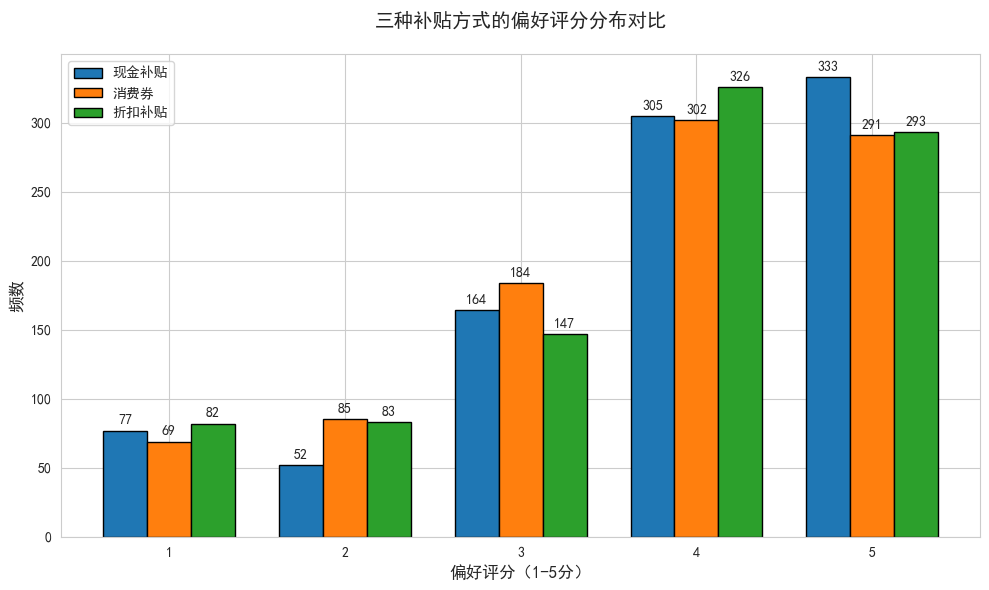

In [9]:
df_counts = pd.DataFrame({
    '现金补贴': cash_counts,
    '消费券': coupon_counts,
    '折扣补贴': discount_counts
}).fillna(0)  # 处理缺失评分（如果有）

# 设置绘图参数
labels = df_counts.index.astype(str)  # x轴标签（1-5分）
x = np.arange(len(labels))  # x轴位置
width = 0.25  # 柱宽

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, df_counts['现金补贴'], width, label='现金补贴', color='#1f77b4', edgecolor='black')
rects2 = ax.bar(x, df_counts['消费券'], width, label='消费券', color='#ff7f0e', edgecolor='black')
rects3 = ax.bar(x + width, df_counts['折扣补贴'], width, label='折扣补贴', color='#2ca02c', edgecolor='black')

# 添加标签和标题
ax.set_xlabel('偏好评分（1-5分）', fontsize=12)
ax.set_ylabel('频数', fontsize=12)
ax.set_title('三种补贴方式的偏好评分分布对比', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

# 在柱子上方添加数据标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# 调整布局
plt.tight_layout()
plt.show()

In [11]:
print(df_counts)

   现金补贴  消费券  折扣补贴
1    77   69    82
2    52   85    83
3   164  184   147
4   305  302   326
5   333  291   293


In [12]:
# 计算每一列的总和
totals = {key: sum(values) for key, values in df_counts.items()}

# 计算每一列的得分
scores = {}
for key, values in df_counts.items():
    total = totals[key]
    score = sum((i + 1) * value / total for i, value in enumerate(values))
    scores[key] = score

# 输出结果
for key, score in scores.items():
    print(f"{key}得分：{score:.2f}")

现金补贴得分：3.82
消费券得分：3.71
折扣补贴得分：3.71


In [2]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
def calculate_cronbach_alpha(df):
    cronbach_alpha = pg.cronbach_alpha(df)
    print(f"Cronbach's α系数: {cronbach_alpha}")
    from factor_analyzer.factor_analyzer import calculate_kmo
    kmo_all, kmo_model = calculate_kmo(df)
    print(f"KMO 检验结果：总体 KMO 值 = {kmo_model:.4f}")

    
    # 2. Bartlett 球形度检验
    chi_square_value, p_value = calculate_bartlett_sphericity(df)
    print(f"Bartlett 球形度检验结果：卡方值 = {chi_square_value:.4f}, p 值 = {p_value:.4f}")
    if p_value < 0.05:
        print("拒绝原假设，数据适合进行因子分析")
    else:
        print("无法拒绝原假设，数据可能不适合进行因子分析")

In [31]:
print("11：")
filtered_columns_11 = df.filter(like='11')
print(filtered_columns_11.columns)
calculate_cronbach_alpha(filtered_columns_11)
print("20：")
filtered_columns_20 = df.filter(like='21')
print(filtered_columns_20.columns)
calculate_cronbach_alpha(filtered_columns_20)
print("22：")
filtered_columns_22 = df.filter(like='23')
print(filtered_columns_22.columns)
calculate_cronbach_alpha(filtered_columns_22)
print("23：")
filtered_columns_23 = df.filter(like='24')
print(filtered_columns_23.columns)
calculate_cronbach_alpha(filtered_columns_23)
print("24：")
filtered_columns_24 = df.filter(like='25')
print(filtered_columns_24.columns[2:])
calculate_cronbach_alpha(filtered_columns_24[filtered_columns_24.columns[2:]])
print("25：")
filtered_columns_25 = df.filter(like='26')
print(filtered_columns_25.columns)
calculate_cronbach_alpha(filtered_columns_25)
print('总：')
calculate_cronbach_alpha(pd.concat([filtered_columns_11,filtered_columns_20,filtered_columns_22,filtered_columns_23,filtered_columns_24[filtered_columns_24.columns[2:]],filtered_columns_25],axis=1))

11：
Index(['11、您对以下补贴方式的偏好程度如何？—现金补贴', '11、消费券', '11、折扣补贴'], dtype='object')
Cronbach's α系数: (0.791107524226116, array([0.767, 0.813]))
KMO 检验结果：总体 KMO 值 = 0.7010
Bartlett 球形度检验结果：卡方值 = 834.6198, p 值 = 0.0000
拒绝原假设，数据适合进行因子分析
20：
Index(['21、请您对下列影响您使用补贴消费因素的重要程度进行打分—对补贴政策的知晓度', '21、对补贴申请流程的知晓度',
       '21、对补贴使用条件和限制的了解情况', '21、补贴金额', '21、商品或服务的性价比提升程度', '21、是否能有效减轻经济负担',
       '21、补贴商品或服务质量', '21、对补贴可靠性的疑虑', '21、可能遇到麻烦', '21、周围群体的消费行为和建议',
       '21、周围群体对补贴消费的普遍态度'],
      dtype='object')
Cronbach's α系数: (0.8987676237694633, array([0.889, 0.908]))
KMO 检验结果：总体 KMO 值 = 0.9534
Bartlett 球形度检验结果：卡方值 = 4128.4646, p 值 = 0.0000
拒绝原假设，数据适合进行因子分析
22：
Index(['23、在有补贴的情况下，您对不同类型补贴商品或服务的购买倾向是—家电（如冰箱、电视机、洗衣机等）',
       '23、电子产品（如手机、电脑、平板等）', '23、新能源汽车', '23、日常消费品（如日用品、食品等）',
       '23、住房（购房补贴相关消费）', '23、旅游出行', '23、教育培训'],
      dtype='object')
Cronbach's α系数: (0.8927375295794425, array([0.882, 0.903]))
KMO 检验结果：总体 KMO 值 = 0.9270
Bartlett 球形度检验结果：卡方值 = 3050.7163, p 值 = 0.0000
拒绝原假设，数据适合进行因子分析
23：

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def plot_heatmap(df, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", center=0)
    plt.title(title)
    plt.show()

In [ ]:
print("21：")
filtered_columns_20 = df.filter(like='21')
print(filtered_columns_20.columns)
calculate_cronbach_alpha(filtered_columns_20[['21、请您对下列影响您使用补贴消费因素的重要程度进行打分—对补贴政策的知晓度', 
 '21、商品或服务的性价比提升程度', '21、是否能有效减轻经济负担',
       '21、补贴商品或服务质量', '21、对补贴可靠性的疑虑',  '21、周围群体的消费行为和建议',
       ]])
plot_heatmap(filtered_columns_20, "Heatmap for 21")

# 
# print("23：")
# filtered_columns_23 = df.filter(like='24')
# print(filtered_columns_23.columns)
# 
# plot_heatmap(filtered_columns_23, "Heatmap for 23")
# 
# print("24：")
# filtered_columns_24 = df.filter(like='25')
# plot_heatmap(filtered_columns_24[filtered_columns_24.columns[2:]], "Heatmap for 24")
# 
# print("25：")
# filtered_columns_25 = df.filter(like='26')
# print(filtered_columns_25.columns)
# 
# plot_heatmap(filtered_columns_25, "Heatmap for 25")

In [23]:
import pandas as pd
df=pd.read_excel('299793279_按序号_政府补贴性政策对居民消费的影响_934_931.xlsx',usecols=[7,8,9,10,11,12,13,14,15,16,17,18,19])

In [26]:
df.columns

Index(['1、您的性别', '2、您的年龄', '3、您所在地区', '4、您的职业', '5、您的学历水平', '6、您的月收入水平（或生活费）',
       '7、您是否了解国家出台的各类补贴政策', '8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)', '8、(电视新闻)',
       '8、(社交媒体（微信、抖音、小红书等）)', '8、(朋友、家人分享)', '8、(线下宣传活动)', '8、(其他（请注明）)'],
      dtype='object')

In [11]:
df['7、您是否了解国家出台的各类补贴政策'].unique()

array([4, 5, 3, 1, 2], dtype=int64)

In [27]:
cols_to_encode = [
    '1、您的性别', 
    '2、您的年龄',
    '3、您所在地区', 
    '4、您的职业', 
    '5、您的学历水平', 
    '6、您的月收入水平（或生活费）'
]

# 将这些列转换为字符串类型
df[cols_to_encode] = df[cols_to_encode].astype(str)

# 对分类变量进行独热编码
df_encoded = pd.get_dummies(df[cols_to_encode], drop_first=True)
channel_columns = [
    '8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)', 
    '8、(电视新闻)', 
    '8、(社交媒体（微信、抖音、小红书等）)', 
    '8、(朋友、家人分享)', 
    '8、(线下宣传活动)', 
    '8、(其他（请注明）)'
]

# 将渠道信息列的 True/False 转换为 1/0
df_encoded = df_encoded.astype(int)

# 合并独热编码后的列和渠道信息列
X = pd.concat([df_encoded, df[channel_columns]], axis=1)


In [4]:
print((X.columns))

Index(['1、您的性别_2', '2、您的年龄_2', '2、您的年龄_3', '2、您的年龄_4', '2、您的年龄_5', '2、您的年龄_6',
       '3、您所在地区_2', '3、您所在地区_3', '3、您所在地区_4', '3、您所在地区_5', '3、您所在地区_6',
       '4、您的职业_2', '4、您的职业_3', '4、您的职业_4', '4、您的职业_5', '4、您的职业_6', '4、您的职业_7',
       '5、您的学历为（含在读）_2', '5、您的学历为（含在读）_3', '5、您的学历为（含在读）_4', '5、您的学历为（含在读）_5',
       '6、您的月收入水平（或生活费）_2', '6、您的月收入水平（或生活费）_3', '6、您的月收入水平（或生活费）_4',
       '6、您的月收入水平（或生活费）_5', '6、您的月收入水平（或生活费）_6',
       '8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)', '8、(电视新闻)', '8、(社交媒体（微信、抖音、小红书等）)',
       '8、(朋友、家人分享)', '8、(线下宣传活动)', '8、(其他（请注明）)'],
      dtype='object')


In [8]:
X=pd.concat([X, df['7、您是否了解国家出台的各类补贴政策']], axis=1)

In [9]:
X.to_excel('X.xlsx', index=False)

In [15]:
df=pd.read_excel('X.xlsx')
X=df.drop(['7、您是否了解国家出台的各类补贴政策'],axis=1)
y=df['7、您是否了解国家出台的各类补贴政策']

In [28]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.miscmodels.ordinal_model import OrderedModel


y = df['7、您是否了解国家出台的各类补贴政策']  # 已经编码的因变量
model = OrderedModel(y, X, distr='logit')
result = model.fit(maxiter=1000)

# 查看回归结果
print(result.summary())

D:\anaconda\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,


                             OrderedModel Results                             
Dep. Variable:     7、您是否了解国家出台的各类补贴政策   Log-Likelihood:                -1483.8
Model:                   OrderedModel   AIC:                             3040.
Method:            Maximum Likelihood   BIC:                             3214.
Date:                Sat, 01 Mar 2025                                         
Time:                        15:54:20                                         
No. Observations:                 931                                         
Df Residuals:                     895                                         
Df Model:                          32                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
1、您的性别_2                            -0.0197      0.122     -0.162      0.872      -0.25

D:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.miscmodels.ordinal_model import OrderedModel
df_encoded = pd.get_dummies(df[['1、您的性别', '2、您的年龄', '3、您所在地区', '4、您的职业', 
                                '5、您的学历为（含在读）', '6、您的月收入水平（或生活费）']], drop_first=True)
X = pd.concat([df_encoded, df[['8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)', '8、(电视新闻)', '8、(社交媒体（微信、抖音、小红书等）)',
       '8、(朋友、家人分享)', '8、(线下宣传活动)', '8、(其他（请注明）)']]])

y = df['7、您是否了解国家出台的各类补贴政策']  # 已经编码的因变量

# 为自变量添加常数项（截距项）
X = sm.add_constant(X)

# 使用多项式逻辑回归进行拟合（MNLogit）
model = sm.MNLogit(y, X)  # 可以使用该方式进行多类分类

# 拟合模型
result = model.fit()

# 查看回归结果
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.398549
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:     7、您是否了解国家出台的各类补贴政策   No. Observations:                  931
Model:                        MNLogit   Df Residuals:                      879
Method:                           MLE   Df Model:                           48
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                 0.04843
Time:                        16:28:20   Log-Likelihood:                -1302.0
converged:                       True   LL-Null:                       -1368.3
Covariance Type:            nonrobust   LLR p-value:                 7.544e-10
            7、您是否了解国家出台的各类补贴政策=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2725      1.251      0.21

                             Feature  Importance
5                    6、您的月收入水平（或生活费）    0.181836
1                             2、您的年龄    0.162529
2                            3、您所在地区    0.152897
3                             4、您的职业    0.132496
4                       5、您的学历为（含在读）    0.127956
0                             1、您的性别    0.063617
10                        8、(线下宣传活动)    0.042999
6   8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)    0.036762
9                        8、(朋友、家人分享)    0.031402
8               8、(社交媒体（微信、抖音、小红书等）)    0.028350
7                           8、(电视新闻)    0.028146
11                       8、(其他（请注明）)    0.011010


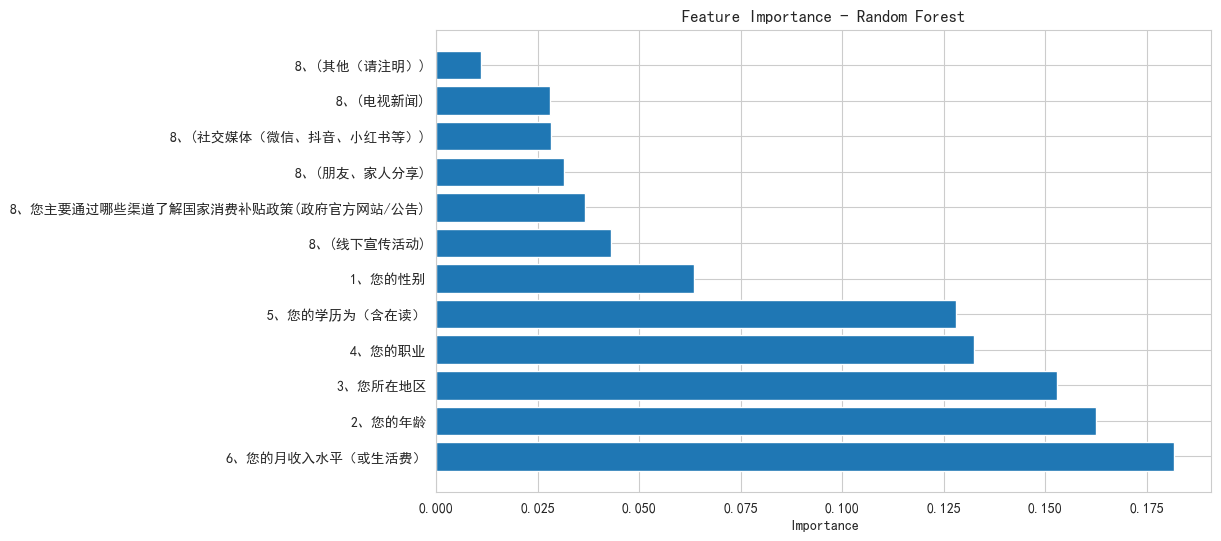

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 假设 df 是您的数据框，X 和 y 已经分开
X = df.drop(columns=['7、您是否了解国家出台的各类补贴政策'])
y = df['7、您是否了解国家出台的各类补贴政策']


# 创建并训练 RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 使用100棵树
rf.fit(X, y)

# 获取特征的重要性
feature_importances = rf.feature_importances_

# 将特征重要性与特征名称配对，并按重要性降序排列
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print(feature_importance_df)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


In [56]:
X=df.drop(columns=['7、您是否了解国家出台的各类补贴政策'])
y = df['7、您是否了解国家出台的各类补贴政策']
print(X.nunique())

1、您的性别                              2
2、您的年龄                              6
3、您所在地区                             6
4、您的职业                              7
5、您的学历为（含在读）                        5
6、您的月收入水平（或生活费）                     6
8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告)    2
8、(电视新闻)                            2
8、(社交媒体（微信、抖音、小红书等）)                2
8、(朋友、家人分享)                         2
8、(线下宣传活动)                          2
8、(其他（请注明）)                         2
dtype: int64


In [54]:
model = OrderedModel(y, X, distr='logit')

# 拟合模型
result = model.fit()

# 查看回归结果
print(result.summary())

D:\anaconda\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,


                             OrderedModel Results                             
Dep. Variable:     7、您是否了解国家出台的各类补贴政策   Log-Likelihood:                -1352.7
Model:                   OrderedModel   AIC:                             2737.
Method:            Maximum Likelihood   BIC:                             2815.
Date:                Thu, 27 Feb 2025                                         
Time:                        17:43:42                                         
No. Observations:                 931                                         
Df Residuals:                     915                                         
Df Model:                          12                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
1、您的性别                              -0.0063      0.121     -0.052      0.958      -0.24

D:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
results_df = pd.DataFrame({
    'Coef': result.params,
    'Std Err': result.bse,
    'z': result.tvalues,
    'P>|z|': result.pvalues,
    '2.5% CI': result.conf_int()[0],
    '97.5% CI': result.conf_int()[1]
})

# 为了方便查看，给表格加上列名
results_df.reset_index(inplace=True)
results_df.columns = ['Variable', 'Coef', 'Std Err', 'z', 'P>|z|', '2.5% CI', '97.5% CI']

# 设置输出路径
output_file = 'ordered_model_results.xlsx'

# 将结果写入 Excel 文件
results_df.to_excel(output_file, index=False)

print(f"结果已保存到 {output_file}")

结果已保存到 ordered_model_results.xlsx


In [30]:
df_encoded = pd.get_dummies(df[['1、您的性别', '2、您的年龄', '3、您所在地区', '4、您的职业', 
                                '5、您的学历为（含在读）', '6、您的月收入水平（或生活费）']])
print(df_encoded)

     1、您的性别  2、您的年龄  3、您所在地区  4、您的职业  5、您的学历为（含在读）  6、您的月收入水平（或生活费）
0         1       2        2       5             4                1
1         1       2        1       5             4                1
2         2       4        5       2             4                3
3         1       2        5       5             4                2
4         1       2        6       5             4                1
..      ...     ...      ...     ...           ...              ...
926       1       2        1       3             2                4
927       1       5        1       1             4                4
928       1       2        1       1             4                3
929       1       4        1       2             5                4
930       1       2        1       5             3                2

[931 rows x 6 columns]


In [9]:
summary_str = result.summary().as_text()

# 指定输出文件路径
output_file = 'regression_results.txt'

# 将结果写入文本文件
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(summary_str)

print(f"回归结果已保存到 {output_file}")

回归结果已保存到 regression_results.txt


In [13]:
params = result.params
std_err = result.bse
p_values = result.pvalues

params_list = list(params)
std_err_list = list(std_err)
p_values_list = list(p_values)

# 为了避免错误，手动创建索引
index = params.index  # 或者可以自定义索引，如果没有索引

# 创建 DataFrame
regression_results = pd.DataFrame({
    '系数': params_list,
    '标准误': std_err_list,
    'p值': p_values_list
}, index=index)

# 设置 Excel 文件输出路径
output_file = 'ordered_logistic_results.xlsx'

# 保存为 Excel 文件
regression_results.to_excel(output_file, sheet_name='回归结果', index=True)

print(f"回归结果已保存到 {output_file}")


ValueError: Length of values (4) does not match length of index (13)

In [14]:
print(params)

                                         0         1         2         3
const                             0.272525  0.426390  1.418826  1.084039
1、您的性别                           -0.392672 -0.108224 -0.455365 -0.458945
2、您的年龄                            0.138962  0.011525  0.049758  0.128906
3、您所在地区                          -0.094898  0.040308 -0.076358 -0.138578
4、您的职业                            0.192755 -0.006374 -0.028079 -0.102914
5、您的学历为（含在读）                     -0.156469 -0.136754 -0.020036 -0.105515
6、您的月收入水平（或生活费）                  -0.265518 -0.169603  0.026515  0.040244
8、您主要通过哪些渠道了解国家消费补贴政策(政府官方网站/公告) -0.426679 -0.386529 -0.428550  0.065022
8、(电视新闻)                         -0.002725  0.453367  0.016455  0.373218
8、(社交媒体（微信、抖音、小红书等）)              1.273685  1.938206  0.915044  1.008596
8、(朋友、家人分享)                       1.255576  1.381976  0.453186  1.065170
8、(线下宣传活动)                        0.827338  0.909780  0.687399  1.119666
8、(其他（请注明）)                      -1.256916 -0.82232

In [23]:
import pandas as pd
df=pd.read_excel('市调数据.xlsx',usecols=[1,2,3,4,6,5,7,13,14,15,16,17,36,37,38])
df.dropna(inplace=True)
df.head()

,性别,年龄,职业,学历,月收入,了解程度,了解渠道,关注度,兴趣程度,11、您对以下补贴方式的偏好程度如何？—现金补贴,11、消费券,11、折扣补贴,17、您平均每次因补贴政策增加的消费金额大概是多少？,18、您因国家补贴而增加的消费频率大概为？,19、您更偏好哪种消费方式？
0,1,2,5,4,1,4,1,4,4,5,4,4,1.0,4.0,3
1,1,2,5,4,1,3,1,5,5,5,5,5,1.0,4.0,1
2,2,4,2,4,3,3,0,3,5,5,4,4,1.0,4.0,3
3,1,2,5,4,2,3,0,2,3,5,2,4,3.0,4.0,1
4,1,2,5,4,1,2,0,2,3,5,4,2,1.0,4.0,1


In [3]:
df.columns

Index(['性别', '年龄', '学历', '月收入', '了解程度', '了解渠道', '关注度', '兴趣程度',
       '11、您对以下补贴方式的偏好程度如何？—现金补贴', '11、消费券', '11、折扣补贴',
       '17、您平均每次因补贴政策增加的消费金额大概是多少？', '18、您因国家补贴而增加的消费频率大概为？',
       '19、您更偏好哪种消费方式？'],
      dtype='object')

In [24]:
cols_to_encode = ['性别', '年龄', '学历', '月收入', '了解程度', '了解渠道', '关注度', '兴趣程度',
       '11、您对以下补贴方式的偏好程度如何？—现金补贴', '11、消费券', '11、折扣补贴',
       '17、您平均每次因补贴政策增加的消费金额大概是多少？', '18、您因国家补贴而增加的消费频率大概为？',
       '19、您更偏好哪种消费方式？']

# 将这些列转换为字符串类型
df[cols_to_encode] = df[cols_to_encode].astype(str)

# 对分类变量进行独热编码
df_encoded = pd.get_dummies(df[cols_to_encode], drop_first=False)

df_encoded = df_encoded.astype(int)

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [24]:
sse = []
k_range = range(1, 11)  # 测试K=1到10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)  # 获取SSE

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [25]:
print(sse)

[6279.640552995392, 5946.239845700023, 5757.66255695524, 5643.002901659203, 5568.95568807043, 5436.535273030128, 5419.5929408437505, 5408.210749826377, 5286.052551756073, 5268.164042836984]


In [25]:
from sklearn.cluster import KMeans
import pandas as pd

# 进行 KMeans 聚类，强制聚成 3 类
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

# 计算每一类的统计性分析
cluster_stats = df_encoded.groupby('Cluster').describe()

# 输出统计信息
print(cluster_stats)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


          性别_1                                                性别_2            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
Cluster                                                                        
0        182.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  182.0  1.000000   
1        182.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  182.0  0.000000   
2        287.0  0.452962  0.498652  0.0  0.0  0.0  1.0  1.0  287.0  0.547038   

         ... 19、您更偏好哪种消费方式？_2      19、您更偏好哪种消费方式？_3                           \
         ...              75%  max            count      mean       std  min   
Cluster  ...                                                                   
0        ...             0.75  1.0            182.0  0.335165  0.473350  0.0   
1        ...             1.00  1.0            182.0  0.258242  0.438875  0.0   
2        ...             0.00  1.0            287.0  0.351916  0.478402  0.0   

                             
        

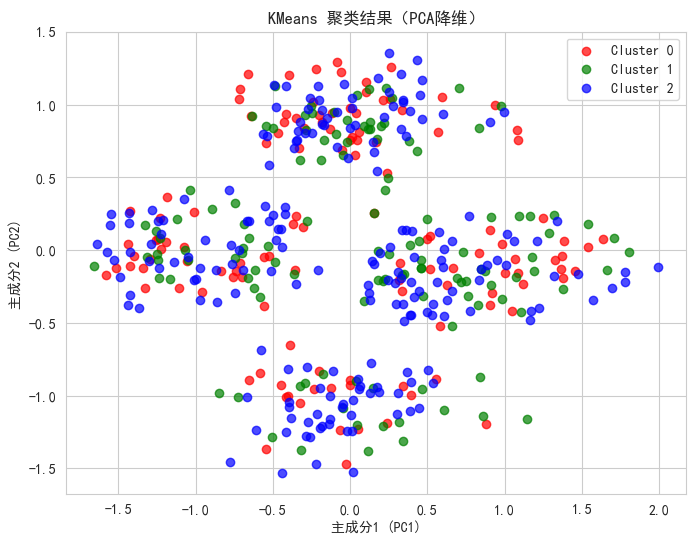

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop(columns=['Cluster']))

# 将降维后的数据转换为 DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']  # 添加聚类结果

# 可视化聚类结果
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']  # 为每个簇分配颜色

# 绘制数据点
for i in range(3):  # 假设聚成 3 类
    cluster_data = df_pca[df_pca['Cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.7)

# 添加标题和标签
plt.title('KMeans 聚类结果（PCA降维）')
plt.xlabel('主成分1 (PC1)')
plt.ylabel('主成分2 (PC2)')
plt.legend()
plt.show()

In [9]:
cluster_stats.to_excel('cluster_stats.xlsx')

In [35]:
# 计算每个类别的众数
cluster_mode = df_encoded.groupby("Cluster").agg(lambda x: x.mode().iloc[0])

# 输出众数信息
print("每个类别的众数统计：")
print(cluster_mode)


每个类别的众数统计：
         性别_1  性别_2  年龄_1  年龄_2  年龄_3  年龄_4  年龄_5  年龄_6  学历_1  学历_2  ...  \
Cluster                                                              ...   
0           0     1     0     0     0     0     0     0     0     0  ...   
1           1     0     0     0     0     0     0     0     0     0  ...   
2           0     1     0     0     0     0     0     0     0     0  ...   

         17、您平均每次因补贴政策增加的消费金额大概是多少？_3.0  17、您平均每次因补贴政策增加的消费金额大概是多少？_4.0  \
Cluster                                                                   
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   

         17、您平均每次因补贴政策增加的消费金额大概是多少？_5.0  18、您因国家补贴而增加的消费频率大概为？_1.0  \
Cluster                                                              
0                                     0                          0   
1                     

In [36]:
cluster_mode.to_excel('cluster_mode1.xlsx')

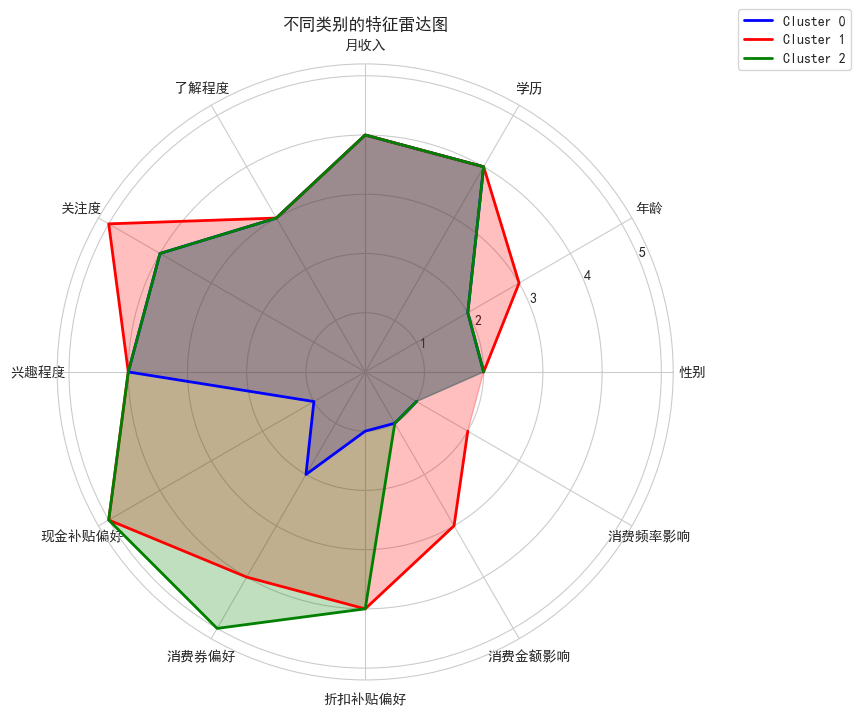

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 定义类别和对应的特征众数值
categories = ['性别', '年龄', '学历', '月收入', '了解程度', '关注度', '兴趣程度', '现金补贴偏好', '消费券偏好', '折扣补贴偏好', '消费金额影响', '消费频率影响']
cluster_0 = [2, 2, 4, 4, 3, 4, 4, 1, 2, 1, 1, 1]
cluster_1 = [2, 3, 4, 4, 3, 5, 4, 5, 4, 4, 3, 2]
cluster_2 = [2, 2, 4, 4, 3, 4, 4, 5, 5, 4, 1, 1]

labels = np.array(categories)
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 添加数据
for cluster, values, color, label in zip(
        [cluster_0, cluster_1, cluster_2],
        ["Cluster 0", "Cluster 1", "Cluster 2"],
        ['b', 'r', 'g'],
        ["Label 0", "Label 1", "Label 2"]):  # 确保有第四个参数

    ax.plot(angles, cluster, color=color, linewidth=2, label=values)
    ax.fill(angles, cluster, color=color, alpha=0.25)

# 处理角度刻度
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10)

# 显示图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('不同类别的特征雷达图')
plt.show()


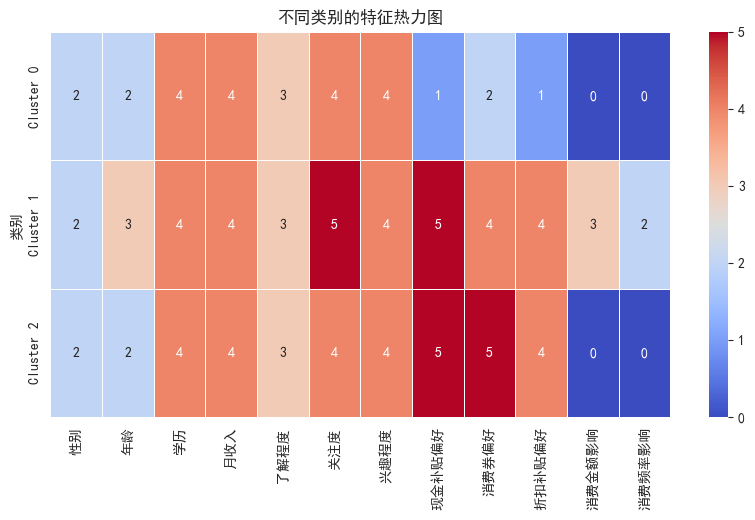

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 数据
data = pd.DataFrame({
    '类别': ['Cluster 0', 'Cluster 1', 'Cluster 2'],
    '性别': [2, 2, 2],
    '年龄': [2, 3, 2],
    '学历': [4, 4, 4],
    '月收入': [4, 4, 4],
    '了解程度': [3, 3, 3],
    '关注度': [4, 5, 4],
    '兴趣程度': [4, 4, 4],
    '现金补贴偏好': [1, 5, 5],
    '消费券偏好': [2, 4, 5],
    '折扣补贴偏好': [1, 4, 4],
    '消费金额影响': [0, 3, 0],
    '消费频率影响': [0, 2, 0]
}).set_index('类别')

# 画热力图
plt.figure(figsize=(10, 5))
sns.heatmap(data, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("不同类别的特征热力图")
plt.show()


In [27]:
import pandas as pd
df=pd.read_excel('市调数据(1).xlsx',usecols=[1,2,3,4,5,6,13,14])
df.head()

,性别,年龄,职业,学历,月收入,了解程度,关注度,兴趣程度
0,1,2,5,4,1,4,4,4
1,1,2,5,4,1,3,5,5
2,2,4,2,4,3,3,3,5
3,1,2,5,4,2,3,2,3
4,1,2,5,4,1,2,2,3


In [2]:
df.columns

Index(['性别', '年龄', '职业', '学历', '了解程度', '关注度', '兴趣程度'], dtype='object')

In [33]:
cols_to_encode = ['性别', '年龄', '职业', '学历', '关注度', '兴趣程度','月收入']

# 将这些列转换为字符串类型
df[cols_to_encode] = df[cols_to_encode].astype(str)

# 对分类变量进行独热编码
df_encoded = pd.get_dummies(df[cols_to_encode], drop_first=True)
channel_columns = ['性别', '年龄',  '学历',  '关注度', '兴趣程度','月收入']

# 将渠道信息列的 True/False 转换为 1/0
df_encoded = df_encoded.astype(int)
X=df_encoded

In [17]:
df['了解程度'] = pd.Categorical(df['了解程度'], ordered=True)

In [32]:
X.describe()

,性别_2,年龄_2,年龄_3,年龄_4,年龄_5,年龄_6,职业_2,职业_3,职业_4,职业_5,...,学历_4,学历_5,关注度_2,关注度_3,关注度_4,关注度_5,兴趣程度_2,兴趣程度_3,兴趣程度_4,兴趣程度_5
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.00000,931.000000,931.000000,...,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,0.534909,0.278195,0.251343,0.216971,0.143931,0.070892,0.135338,0.19334,0.135338,0.108485,...,0.532760,0.225564,0.071966,0.190118,0.344791,0.326531,0.069817,0.195489,0.356606,0.315789
std,0.499048,0.448351,0.434018,0.412404,0.351209,0.256781,0.342268,0.39513,0.342268,0.311160,...,0.499194,0.418178,0.258570,0.392605,0.475555,0.469196,0.254976,0.396790,0.479254,0.465079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X.columns

Index(['性别_2', '年龄_2', '年龄_3', '年龄_4', '年龄_5', '年龄_6', '职业_2', '职业_3', '职业_4',
       '职业_5', '职业_6', '职业_7', '学历_2', '学历_3', '学历_4', '学历_5', '关注度_2',
       '关注度_3', '关注度_4', '关注度_5', '兴趣程度_2', '兴趣程度_3', '兴趣程度_4', '兴趣程度_5',
       '月收入_2', '月收入_3', '月收入_4', '月收入_5', '月收入_6'],
      dtype='object')

In [11]:
X=X.drop(columns=['const'])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
y = df['了解程度']  # 因变量

# 拟合多元有序回归模型
model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')

# 输出结果
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.248808
         Iterations: 191
         Function evaluations: 192
         Gradient evaluations: 192
                             OrderedModel Results                             
Dep. Variable:                   了解程度   Log-Likelihood:                -1162.6
Model:                   OrderedModel   AIC:                             2391.
Method:            Maximum Likelihood   BIC:                             2551.
Date:                Thu, 06 Mar 2025                                         
Time:                        00:50:57                                         
No. Observations:                 931                                         
Df Residuals:                     898                                         
Df Model:                          29                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [36]:
summary_df = pd.read_html(res.summary().tables[1].as_html(), header=0, index_col=0)[0]

# 保存到 Excel 文件
output_file = "model_results.xlsx"
summary_df.to_excel(output_file, sheet_name="Model Results")

print(f"模型结果已保存到 {output_file}")

模型结果已保存到 model_results.xlsx
